<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  📌  Trực Quan Hóa Dữ Liệu - 21_21 📌
  
   Lab 1
</div>

# 1. Thu thập dữ liệu

# 2. Khám phá dữ liệu và tiền xử lí dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os 
import zipfile


### 2.1.1 Đọc dữ liệu

In [2]:
data_reduced_filezippath=r"data/US_Accidents_Reduced.zip"
data_reduced_filepath=r"data/US_Accidents_Reduced.csv"

# Kiểm tra xem tệp đã được giải nén chưa
if not os.path.exists(data_reduced_filepath):
    if os.path.exists(data_reduced_filezippath):
        with zipfile.ZipFile(data_reduced_filezippath, 'r') as zip_ref:
            zip_ref.extractall("data")
        zip_ref.close()
    else:
        print("Không tìm thấy tệp dữ liệu")
        assert False
# Đọc tệp CSV vào DataFrame
chunk_size = 100000  # Điều chỉnh phù hợp với bộ nhớ của hệ thống
chunks = pd.read_csv(data_reduced_filepath, chunksize=chunk_size)

# List để lưu từng chunk
chunk_list = []

# Lặp qua từng chunk và thêm vào list
for chunk in chunks:
    chunk_list.append(chunk)

# Gộp tất cả các chunk thành một DataFrame
df = pd.concat(chunk_list, ignore_index=True)


### 2.1.2 Kích thước dữ liệu

In [3]:
df.shape

(772839, 46)

### 2.1.3 Giải thích ý nghĩa các cột

In [4]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-7182628,Source1,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-5404588,Source1,2,2022-04-21 10:01:00.000000000,2022-04-21 11:44:08.000000000,38.781024,-121.265820,38.780377,-121.265815,0.045,...,False,False,True,False,False,False,Day,Day,Day,Day
2,A-156000,Source3,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-1871277,Source2,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2031222,Source2,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


- **ID**: ID của vụ tai nạn
- **Source**: Nguồn dữ liệu thô 
- **Severity**: Mức độ nghiêm trọng của vụ tai nạn, có giá trị từ 1 -> 4, biểu thị mức độ ảnh hưởng tăng dần lên hoạt động giao thông
- **Start_Time**: Thời gian bắt đầu vụ tai nạn theo giờ địa phương
- **End_Time**: Thời gian kết thúc vụ tai nạn, chỉ thời gian ảnh hưởng đến giao thông chấm dứt theo giờ địa phương
- **Start_Lat**: Vĩ độ của địa điểm xảy ra tai nạn
- **Start_Lng**: Kinh độ của địa điểm xảy ra tai nạn
- **End_Lat**: Vĩ độ của địa điểm kết thúc
- **End_Lng**: Kinh độ của địa điểm kết thúc
- **Distance(mi)**: Chiều dài đoạn đường bị ảnh hưởng bởi vụ tai nạn, tính bằng Miles
- **Description**: Mô tả về vụ tai nạn
- **Street**: Tên đường trong trường địa chỉ
- **City**: Tên thành phố trong trường địa chỉ
- **County**: Tên quận trong trường địa chỉ
- **State**: Tên bang trong trường địa chỉ
- **Zipcode**: Mã bưu chính trong trường địa chỉ
- **Country**: Tên quốc gia trong trường địa chỉ
- **Timezone**: Múi giờ dựa trên vị trí xảy ra tai nạn (miền đông, miền trung,...)
- **Airport_Code**: Trạm thời tiết dựa trên sân bay, gần nhất với vị trí của vụ tai nạn
- **Weather_Timestamp**: Thời gian ghi nhận thông tin thời tiết (theo giờ địa phương)
- **Temperature(F)**: Hiển thị nhiệt độ (tính bằng Fahrenheit)
- **Wind_Chill(F)**: Hiển thị mức độ lạnh của không khí (tính bằng Fahrenheit)
- **Humidity(%)**: Hiển thị độ ẩm (tính bằng %)
- **Pressure(in)**: Hiển thị áp suất không khí (tính bằng inches)
- **Visibility(mi)**: Hiển thị tầm nhìn (tính bằng miles)
- **Wind_Direction**: Hiển thị hướng gió
- **Wind_Speed(mph)**: Hiển thị tốc độ gió (tính bằng miles / giờ)
- **Precipitation(in)**: Hiển thị lượng mưa tính theo inches (nếu có)
- **Weather_Condition**: Hiển thị tình trạng thời tiết (mưa, có tuyết, có sấm sét,...)
- **Amenity**: Chú thích địa điểm cho biết sự hiện diện của tiện nghi ở vị trí lân cận
- **Bump**: Chú thích địa điểm cho biết sự hiện diện của gờ giảm tốc ở vị trí lân cận
- **Crossing**: Chú thích địa điểm cho biết sự hiện diện của điểm băng qua ở vị trí lân cận
- **Give_Way**: Chú thích địa điểm cho biết sự hiện diện của đoạn nhường đường ở vị trí lân cận
- **Junction**: Chú thích địa điểm cho biết sự hiện diện của giao lộ ở vị trí lân cận
- **No_Exit**: Chú thích địa điểm cho biết sự hiện diện của đoạn đường không có lối ra ở vị trí lân cận
- **Railway**: Chú thích địa điểm cho biết sự hiện diện của đường sắt ở vị trí lân cận
- **Roundabout**: Chú thích địa điểm cho biết sự hiện diện của bùng binh ở vị trí lân cận
- **Station**: Chú thích địa điểm cho biết sự hiện diện của trạm tàu ở vị trí lân cận
- **Stop**: Chú thích địa điểm cho biết sự hiện diện của điểm dừng ở vị trí lân cận
- **Traffic_Calming**: Chú thích địa điểm cho biết sự hiện diện của các biện pháp giảm tốc ở vị trí lân cận
- **Traffic_Signal**: Chú thích địa điểm cho biết sự hiện diện của đèn giao thông ở vị trí lân cận
- **Turning_Loop**: Chú thích địa điểm cho biết sự hiện diện của vòng xoay ở vị trí lân cận
- **Sunrise_Sunset**: Hiển thị khoảng thời gian trong ngày (dựa vào bình minh / hoàng hôn)
- **Civil_Twilight**: Hiển thị khoảng thời gian trong ngày (dựa vào choạng vạng dân sự)
- **Nautical_Twilight**: Hiển thị khoảng thời gian trong ngày (dựa vào choạng vạng hải lý)
- **Astronomical_Twilight**: Hiển thị khoảng thời gian trong ngày (dựa vào choạng vạng thiên văn)


## 2.2 Trùng lặp dữ liệu

- Trùng lặp giữa các dòng của dữ liệu

In [5]:
is_duplicated = np.any(df.duplicated())
if is_duplicated:
    print('Dữ liệu có trùng lặp')
else:
    print('Dữ liệu không trùng lặp')

Dữ liệu không trùng lặp


- Có cột nào có dữ liệu lặp lại không ? (Cột đó chỉ có một giá trị)

In [6]:
duplicated_cols = [col for col in df.columns if df[col].nunique() == 1]
print(duplicated_cols)

['Country', 'Turning_Loop']


In [7]:
# df[duplicated_cols].value_counts()
df["Country"].nunique()

1

- Cột `Country`, `Turning_Loop` chỉ có các 1 giá trị là US và False .Thực tế ta không thu được nhiều giá trị với các cột chỉ có một giá trị nên ta có thể xoá đi 2 cột này.

In [8]:
df=df.drop(columns=duplicated_cols)

## 2.3 Kiểu dữ liệu các cột

- Tổng quan dữ liệu các cột

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772839 entries, 0 to 772838
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     772839 non-null  object 
 1   Source                 772839 non-null  object 
 2   Severity               772839 non-null  int64  
 3   Start_Time             772839 non-null  object 
 4   End_Time               772839 non-null  object 
 5   Start_Lat              772839 non-null  float64
 6   Start_Lng              772839 non-null  float64
 7   End_Lat                432291 non-null  float64
 8   End_Lng                432291 non-null  float64
 9   Distance(mi)           772839 non-null  float64
 10  Description            772838 non-null  object 
 11  Street                 771751 non-null  object 
 12  City                   772811 non-null  object 
 13  County                 772839 non-null  object 
 14  State                  772839 non-nu

- Xét về kiểu dữ liệu: Ta thấy có cột `Start_Time`,`End_Time`, `Weather_Timestamp` có ý nghĩa thời gian nhưng được lưu ở kiểu **object**  .Vì vậy cần chuyển đổi kiểu dữ liệu của 3 cột bên trên sang dạng **datetime**.

In [10]:
# #Chuyển các cột time sang kiểu datetime
time_cols=['Start_Time','End_Time','Weather_Timestamp']
for col in time_cols:
    df[col]=pd.to_datetime(df[col], format='mixed')


In [11]:
#in ra cột Start_Time, End_Time, Weather_Timestamp
df[time_cols].head()


,Start_Time,End_Time,Weather_Timestamp
0,2020-04-17 09:29:30,2020-04-17 10:29:30,2020-04-17 09:24:00
1,2022-04-21 10:01:00,2022-04-21 11:44:08,2022-04-21 09:55:00
2,2016-08-12 16:45:00,2016-08-12 17:15:00,2016-08-12 16:53:00
3,2019-09-20 15:22:16,2019-09-20 15:56:00,2019-09-20 14:58:00
4,2019-06-03 16:55:43,2019-06-03 18:12:09,2019-06-03 16:51:00


- Kiểu dữ liệu các cột sau khi chuyển đổi

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772839 entries, 0 to 772838
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     772839 non-null  object        
 1   Source                 772839 non-null  object        
 2   Severity               772839 non-null  int64         
 3   Start_Time             772839 non-null  datetime64[ns]
 4   End_Time               772839 non-null  datetime64[ns]
 5   Start_Lat              772839 non-null  float64       
 6   Start_Lng              772839 non-null  float64       
 7   End_Lat                432291 non-null  float64       
 8   End_Lng                432291 non-null  float64       
 9   Distance(mi)           772839 non-null  float64       
 10  Description            772838 non-null  object        
 11  Street                 771751 non-null  object        
 12  City                   772811 non-null  obje

Xét hai cột `Wind_Chill(F)`, `Temperature(F)` có đơn vị là **Fahrenheit**, để dễ dàng hình dung, ta sẽ chuyển về đơn vị **Celcius**

In [13]:
df.rename(columns={'Wind_Chill(F)': 'Wind_Chill(C)', 'Temperature(F)': 'Temperature(C)'}, inplace=True)

# Chuyển đổi độ F sang độ C
df['Wind_Chill(C)'] = (df['Wind_Chill(C)'] - 32) * 5/9
df['Temperature(C)'] = (df['Temperature(C)'] - 32) * 5/9

## 2.4 Khám phá dữ liệu numerical và categorical

### 2.4.1 Với dữ liệu dạng số

In [14]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(C)', 'Wind_Chill(C)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

#### 2.4.1.1 Missing value

In [15]:
import plotly.graph_objects as go
import pandas as pd

# Lặp qua các cột số để tính tỉ lệ giá trị thiếu
missing_percentages = [(col, df[col].isnull().mean() * 100) for col in numerical_cols]

# Sắp xếp theo tỉ lệ giảm dần
missing_percentages.sort(key=lambda x: x[1], reverse=False)

# Tạo DataFrame từ list
missing_df = pd.DataFrame(missing_percentages, columns=['Cột', 'Tỉ lệ giá trị thiếu (%)'])

# Vẽ biểu đồ cột ngang sử dụng Plotly
fig = go.Figure(go.Bar(
            x=missing_df['Tỉ lệ giá trị thiếu (%)'],
            y=missing_df['Cột'],
            orientation='h'))

fig.update_layout(
    title='Tỉ lệ giá trị thiếu trong các cột số',
    xaxis=dict(title='Tỉ lệ giá trị thiếu (%)'),
    yaxis=dict(title='Cột'),
    bargap=0.1,  # Độ rộng của khoảng trống giữa các cột
    margin=dict(l=100, r=50, t=50, b=50)  # Lề của biểu đồ
)

fig.show()


- Chúng ta có thể thấy, 2 cột `End_lat` và `End_Lng` là 2 cột tọa độ có tỉ lệ missing cao. Chúng ta có thể drop hoặc điền bằng 0.
- Những cột còn lại có thể điền missing value bằng **mean**

In [16]:

#drop cột End_lat và End_Lng
df=df.drop(columns=['End_Lat','End_Lng'])
# điền cho những cột còn lại
#bỏ End_Lat và End_Lng ra khỏi numerical_cols
numerical_cols = numerical_cols.drop(['End_Lat', 'End_Lng'])
columns_to_fill_mean = numerical_cols
df[columns_to_fill_mean] = df[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

print(df[numerical_cols].isnull().sum())


Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Temperature(C)       0
Wind_Chill(C)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
dtype: int64


#### 2.4.1.1 Phân phối của dữ liệu dạng số

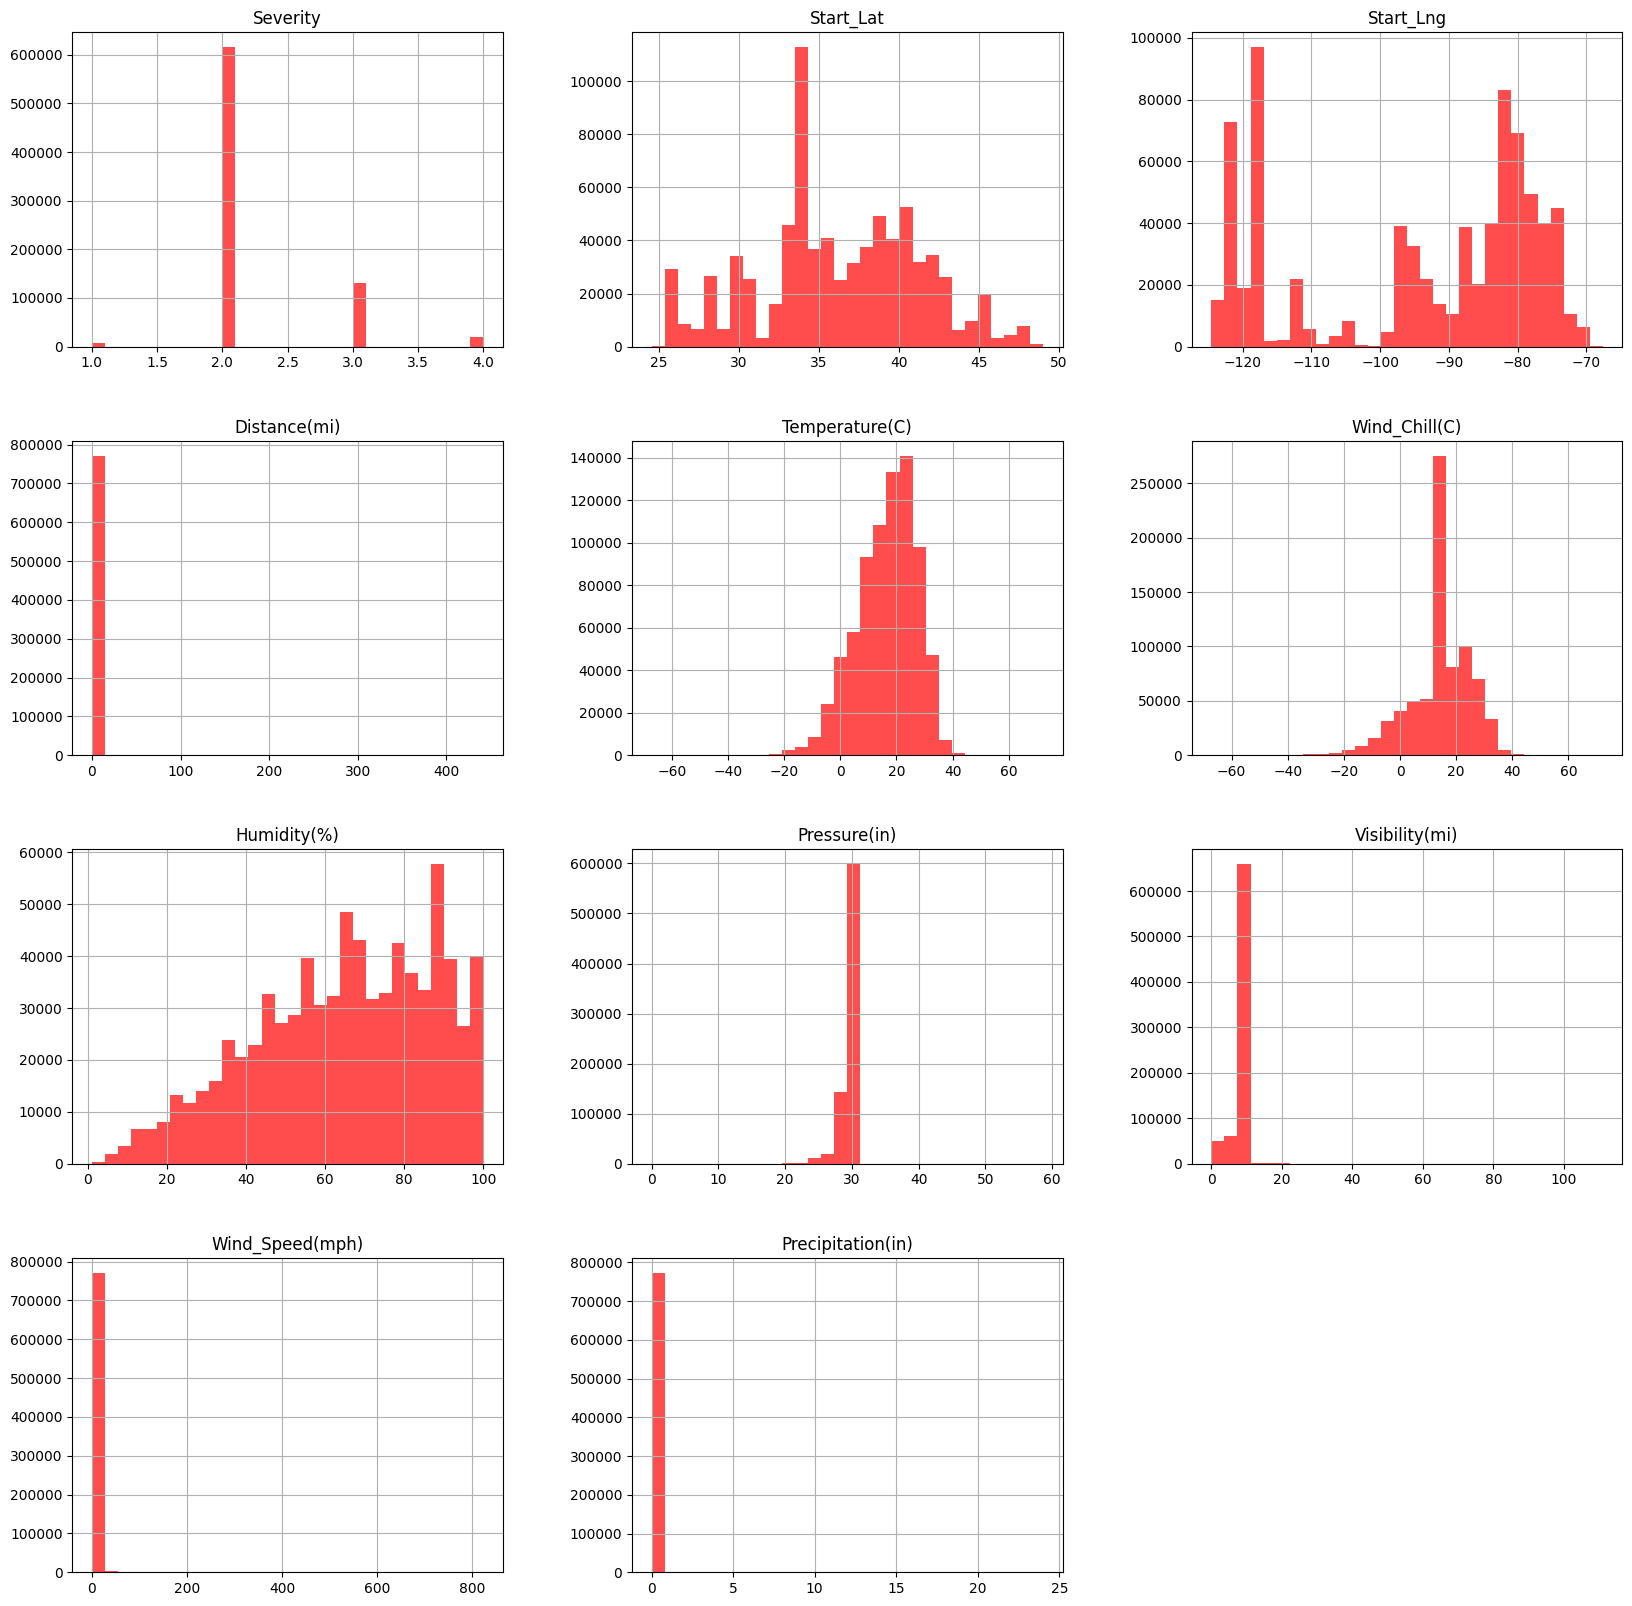

In [17]:
#in ra phân phối của các cột
df[numerical_cols].hist(bins=30, figsize=(20,20), color='r', alpha=0.7)
plt.show()


### 2.4.2 Xử lí các cột categories

In [18]:
#Chọn ra các cột có kiểu dữ liệu là category
category_cols = df.select_dtypes(include=['object','bool']).columns
category_cols

Index(['ID', 'Source', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

#### 2.4.2.1 Kiểm tra các giá trị bị thiếu

In [19]:
import plotly.graph_objects as go

# Tính tỉ lệ giá trị thiếu của mỗi cột
missing_percentages = df[category_cols].isnull().mean() * 100

# Sắp xếp giảm dần các cột theo tỉ lệ giá trị thiếu
missing_percentages_sorted = missing_percentages.sort_values(ascending=True)

# Vẽ biểu đồ cột ngang sử dụng Plotly
fig = go.Figure(go.Bar(
            x=missing_percentages_sorted,
            y=missing_percentages_sorted.index,
            orientation='h',
            marker=dict(color='skyblue')
        ))

fig.update_layout(
    title='Tỉ lệ giá trị thiếu trong các cột category',
    xaxis=dict(title='Tỉ lệ giá trị thiếu (%)'),
    yaxis=dict(title='Cột')
)

fig.show()


Ta có thể thấy tỉ lệ giá trị bị thiếu ở các cột này là rất thấp, vậy nên, ta sẽ điền các giá trị bị thiếu này bằng mode

In [20]:
#Điền các giá trị thiếu bằng giá trị mode
df[category_cols] = df[category_cols].apply(lambda x: x.fillna(x.mode()[0]))
#Kiếm tra lại xem còn có cột nào bị thiếu giá trị không (in ra cột có số lượng giá trị thiếu > 0)
missing_values = df[category_cols].isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values



Series([], dtype: int64)

#### 2.4.2.1 Kiểm tra phân bố của các giá trị trong các cột categories

Với mỗi cột, xem xét tỉ lệ các giá trị bên trong của cột đó

In [21]:
category_cols

Index(['ID', 'Source', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [22]:
#in ra số lượng giá trị độc nhất của các cột
unique_value_counts = df[category_cols].nunique().sort_values(ascending=True)
unique_value_counts

Bump                          2
Civil_Twilight                2
Sunrise_Sunset                2
Traffic_Signal                2
Traffic_Calming               2
Stop                          2
Station                       2
Roundabout                    2
Railway                       2
No_Exit                       2
Junction                      2
Give_Way                      2
Crossing                      2
Astronomical_Twilight         2
Amenity                       2
Nautical_Twilight             2
Source                        3
Timezone                      4
Wind_Direction               24
State                        49
Weather_Condition           115
County                     1672
Airport_Code               1913
City                      10272
Street                   112940
Zipcode                  178510
Description              597931
ID                       772839
dtype: int64

- Do thông tin về địa điểm xảy ra tai nạn đã được thể hiện qua các biến khác như County, City, nên ta sẽ bỏ cột Zipcode
- Do ID chỉ để định danh vụ tai nạn, sau khi đã kiểm tra trùng lặp, ta có thể loại bỏ cột này
- Do ta không quan tâm đến vị trí của trạm thời tiết gần vụ tai nạn, nên ta cũng sẽ bỏ cột này

In [23]:
#drop cột Zipcode
df.drop(columns=['Zipcode', 'Airport_Code', 'ID','Source','Description','Street'], inplace=True)
unique_value_counts =unique_value_counts.drop(['Zipcode', 'Airport_Code', 'ID','Source','Street'])

# Sau khi đã tiền xử lí, lưu dữ liệu đẫ xử lí vào file csv
df.to_csv("data/US_Accidents_processed.csv",index=False)

Ta có thể thấy hầu hết các cột đều phù hợp với việc biểu diễn bằng biểu đồ tròn để quan sát phân bố của các giá trị trong cột, trừ các cột có quá nhiều giá trị, đối với các cột này, ta sẽ dùng biểu đồ cột để quan sát top 15 giá trị có tần suất xuất hiện cao nhất

Trước hết, ta sẽ vẽ biểu đồ tròn để quan sát cách dữ liệu phân phối ở các cột này

In [24]:
#Lấy ra tên các cột có số lượng giá trị độc nhất nhỏ hơn 5
pie_chart = unique_value_counts[unique_value_counts < 5].index
pie_chart

Index(['Bump', 'Civil_Twilight', 'Sunrise_Sunset', 'Traffic_Signal',
       'Traffic_Calming', 'Stop', 'Station', 'Roundabout', 'Railway',
       'No_Exit', 'Junction', 'Give_Way', 'Crossing', 'Astronomical_Twilight',
       'Amenity', 'Nautical_Twilight', 'Timezone'],
      dtype='object')

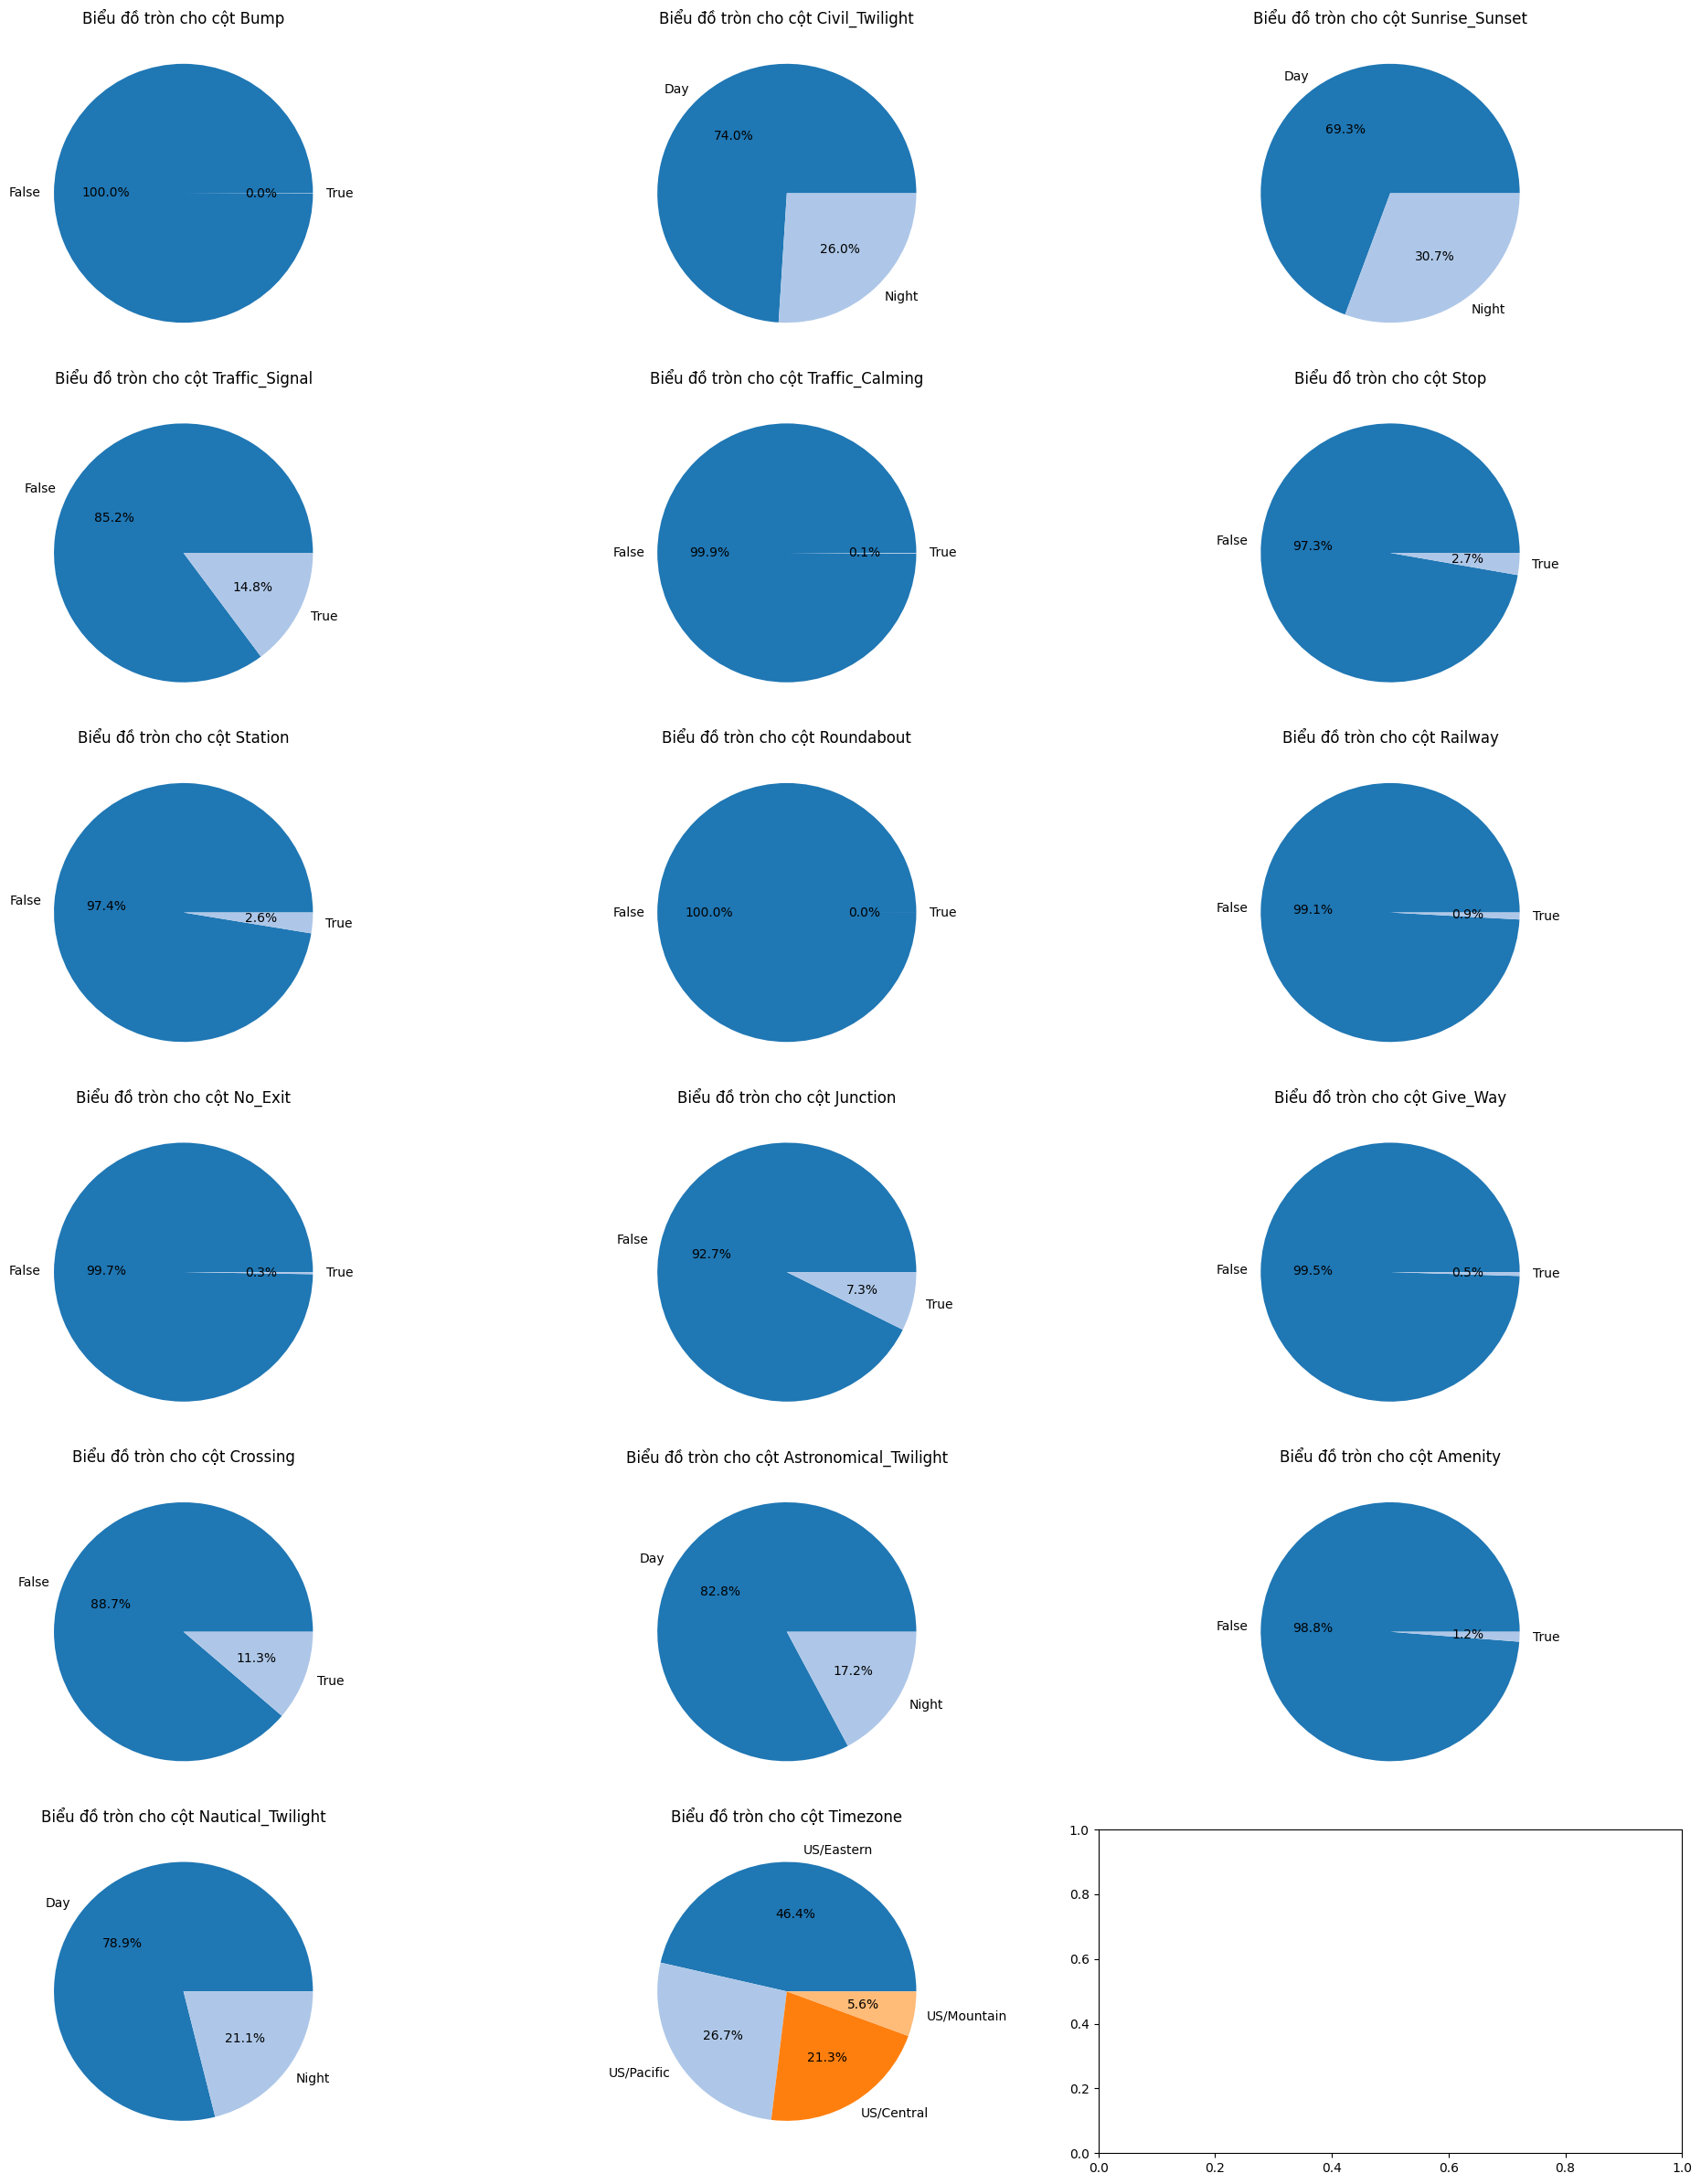

In [25]:
#bỏ cột Id và Description
category_cols = pie_chart

# Định nghĩa một bảng màu gồm 10 màu
palette = plt.cm.tab20.colors[:12]

import math

num_cols = 3
num_rows = math.ceil(len(category_cols) / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows))

for i, column in enumerate(category_cols):
    row = i // num_cols
    col = i % num_cols
    
    counts = df[column].value_counts(normalize=True)
    counts = counts.sort_values(ascending=False)

    axs[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=palette)
    axs[row, col].set_title(f'Biểu đồ tròn cho cột {column}')

plt.tight_layout()
plt.show()


VẼ biểu đồ cột cho các giá trị còn lại

In [26]:
bar_chart = unique_value_counts[unique_value_counts > 5].index
bar_chart = bar_chart.drop(['Description'])
bar_chart

Index(['Wind_Direction', 'State', 'Weather_Condition', 'County', 'City'], dtype='object')

In [27]:
import plotly.graph_objects as go

# Hàm vẽ biểu đồ cột ngang với dữ liệu được chuẩn hóa thành tỷ lệ phần trăm và sắp xếp giảm dần
def plot_horizontal_bar_chart(df, column, xlabel, ylabel, title):
    fig = go.Figure()
    sorted_data = df[column].value_counts(normalize=True).nlargest(15).sort_values(ascending=False)
    fig.add_trace(go.Bar(
        y=sorted_data.index,
        x=sorted_data.values * 100,
        orientation='h',
        marker=dict(color='blue'),
    ))

    fig.update_layout(
        title=title,
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        yaxis=dict(autorange="reversed"),
        height=600,
        width=800,
    )

    fig.show()

# Hoặc có thể duyệt qua tất cả các cột trong bar_chart để vẽ biểu đồ cho mỗi cột
for column in bar_chart:
    plot_horizontal_bar_chart(df, column, '% Số lần xuất hiện', 'Tên đường', f'Tỷ lệ phần trăm của các giá trị xuất hiện trong cột {column}')
